In [1]:
# Importação de Bibliotecas

In [2]:
import missingno as msno
import numpy as np
import pandas as pd
import seaborn as sns
import warnings

import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

from sklearn.metrics import accuracy_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

from sklearn.neighbors import KNeighborsClassifier

from sklearn import svm

from sklearn.neural_network import MLPClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

import statsmodels.stats.api as sms

In [3]:
# Configuração das Bibliotecas

In [4]:
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',500)

In [5]:
def Separa_dados(dataset_testado,k_qtd):

    #DEFINE QUAL ARQUIVO SERÁ APLICADO O MODELO
    if dataset_testado == 'COMPLETO':
        df_nb = pd.read_csv("../RESULTADOS/df_final_20200510.csv") #COMPLETO
    
    if dataset_testado == 'COMPLETO_MORF':
        df_nb = pd.read_csv("../EXPERIMENTOS/df_final_morf_20200710.csv") #COMPLETO SÓ MORF
    
    if dataset_testado == 'PCA':
        df_nb = pd.read_csv("../RESULTADOS/df_pca_pc53_20200510.csv") #PCA
    
    if dataset_testado == 'PCA30':
        df_nb = pd.read_csv("../EXPERIMENTOS/df_pca_pc30_20200724.csv") #PCA
    
    #if dataset_testado == 'PCA50':
    #    df_nb = pd.read_csv("../EXPERIMENTOS/df_pca_pc50_20200718.csv") #PCA
        
    #if dataset_testado == 'PCA53':
    #    df_nb = pd.read_csv("../EXPERIMENTOS/df_pca_pc53_20200718.csv") #PCA
    
    #if dataset_testado == 'PCA55':
    #    df_nb = pd.read_csv("../EXPERIMENTOS/df_pca_pc55_20200718.csv") #PCA
        
    #if dataset_testado == 'PCA75':
    #    df_nb = pd.read_csv("../EXPERIMENTOS/df_pca_pc75_20200718.csv") #PCA
        
    #if dataset_testado == 'PCA171':
    #    df_nb = pd.read_csv("../EXPERIMENTOS/df_pca_pc171_20200718.csv") #PCA

    if dataset_testado == 'PCA_MORF':
        df_nb = pd.read_csv("../EXPERIMENTOS/df_pca_pc53_morf_20200710.csv") #PCA
    
    if dataset_testado == 'PCA_IMPORTANCES':
        df_nb = pd.read_csv("../RESULTADOS/df_pca_features_importances_20200510.csv") #PCA IMPORTANCES

    if dataset_testado == 'KBEST':
        df_nb = pd.read_csv("../RESULTADOS/df_kbest_fclassif_20200510.csv") #KBEST f_classif
    
    if dataset_testado == 'KBEST_MORF':
        df_nb = pd.read_csv("../EXPERIMENTOS/df_kbest_fclassif_morf_20200710.csv") #KBEST f_classif

    if dataset_testado == 'KBEST_2':
        df_nb = pd.read_csv("../RESULTADOS/df_kbest_mutual_info_classif_20200522.csv") #KBEST mutual_info_classif

    if dataset_testado == 'RFE':
        df_nb = pd.read_csv("../RESULTADOS/df_RFE_20200510.csv") #RFE
    
    if dataset_testado == 'RFE_MORF':
        df_nb = pd.read_csv("../EXPERIMENTOS/df_RFE_morf_20200710.csv") #RFE
    
    if dataset_testado == 'RANDON_FOREST_IMPORTANTES':
        df_nb = pd.read_csv("../RESULTADOS/df_randon_forest_importances_20200510.csv") #RANDON FOREST

    if dataset_testado == 'SBS':
        df_nb = pd.read_csv("../RESULTADOS/df_SBS_20200510.csv") #RANDON FOREST

    if dataset_testado == 'KBEST_S_IDADE':
        df_nb = pd.read_csv("../RESULTADOS/df_kbest_fclassif_sem_idade_20200522.csv") #KBEST F CLASSIF SEM IDADE

    #TESTE COM SFS
    if dataset_testado == 'SFS_5_CV10':
        df_nb = pd.read_csv("../RESULTADOS/df_SFS_20200523_N5_CV10.csv") #SFS 15 VIZINHOS
    
    if dataset_testado == 'SFS_5_CV10_MORF':
        df_nb = pd.read_csv("../EXPERIMENTOS/df_SFS_morf_20200710_N5_CV10.csv") #SFS 15 VIZINHOS

    if dataset_testado == 'SFS_15_CV00':
        df_nb = pd.read_csv("../RESULTADOS/df_SFS_20200523_N15_CV00.csv") #SFS 15 VIZINHOS

    if dataset_testado == 'SFS_15_CV10':
        df_nb = pd.read_csv("../RESULTADOS/df_SFS_20200523_N15_CV10.csv") #SFS 15 VIZINHOS

    if dataset_testado == 'SFS_30_CV00':
        df_nb = pd.read_csv("../RESULTADOS/df_SFS_20200510_N30_CV00.csv") #SFS 30 VIZINHOS

    if dataset_testado == 'SFS_90_CV00':
        df_nb = pd.read_csv("../RESULTADOS/df_SFS_20200523_N90_CV00.csv") #SFS 90 VIZINHOS

    if dataset_testado == 'SFS_180_CV00':
        df_nb = pd.read_csv("../RESULTADOS/df_SFS_20200523_N180_CV00.csv") #SFS 180 VIZINHOS

    if dataset_testado == 'SFS_180_CV10':
        df_nb = pd.read_csv("../RESULTADOS/df_SFS_20200523_N180_CV10.csv") #SFS 180 VIZINHOS


    #TESTE COM SFFS
    if dataset_testado == 'SFFS_5_CV10':
        df_nb = pd.read_csv("../RESULTADOS/df_SFFS_20200523_N15_CV10.csv") #SFFS 15 VIZINHOS

    if dataset_testado == 'SFFS_15_CV00':
        df_nb = pd.read_csv("../RESULTADOS/df_SFFS_20200523_N15_CV00.csv") #SFFS 15 VIZINHOS

    if dataset_testado == 'SFFS_15_CV10':
        df_nb = pd.read_csv("../RESULTADOS/df_SFFS_20200523_N15_CV10.csv") #SFFS 15 VIZINHOS

    if dataset_testado == 'SFFS_30_CV00':
        df_nb = pd.read_csv("../RESULTADOS/df_SFFS_20200523_N30_CV00.csv") #SFFS 30 VIZINHOS

    if dataset_testado == 'SFFS_30_CV10':
        df_nb = pd.read_csv("../RESULTADOS/df_SFFS_20200523_N30_CV10.csv") #SFFS 30 VIZINHOS       

    if dataset_testado == 'SFFS_90_CV00':
        df_nb = pd.read_csv("../RESULTADOS/df_SFFS_20200523_N90_CV00.csv") #SFFS 30 VIZINHOS  

    if dataset_testado == 'SFFS_90_CV10':
        df_nb = pd.read_csv("../RESULTADOS/df_SFFS_20200523_N90_CV10.csv") #SFFS 30 VIZINHOS 

    # Separando a coluna Target das características
    dfx1 = df_nb.drop('TARGET', axis=1)
    masc = df_nb['TARGET'] == 2
    df_nb.loc[masc, 'TARGET'] = 1
    Y = df_nb.loc[:, 'TARGET']

    # Transformando para numpy
    X = dfx1.to_numpy()

    # Normalizando
    scaler = StandardScaler().fit(X)
    XX = scaler.transform(X)


    cv = StratifiedKFold(n_splits=k_qtd, shuffle=True, random_state=1)

    
    return df_nb,XX,Y,cv

In [6]:
# Treinamento e Validação dos Classificadores com a Utilização do GridSearch

/home/vagner/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: C <= 0

  FitFailedWarning)
/home/vagner/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: C <= 0

  FitFailedWarning)
/home/vagner/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: C <= 0

  FitFailedWarning)
/home/vagner/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be se

/home/vagner/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: C <= 0

  FitFailedWarning)
/home/vagner/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: C <= 0

  FitFailedWarning)
/home/vagner/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: C <= 0

  FitFailedWarning)
/home/vagner/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be se

/home/vagner/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: C <= 0

  FitFailedWarning)
/home/vagner/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: C <= 0

  FitFailedWarning)
/home/vagner/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: C <= 0

  FitFailedWarning)
/home/vagner/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be se

/home/vagner/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: C <= 0

  FitFailedWarning)
/home/vagner/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: C <= 0

  FitFailedWarning)
/home/vagner/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: C <= 0

  FitFailedWarning)
/home/vagner/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be se

/home/vagner/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/vagner/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/vagner/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/vagner/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: Un

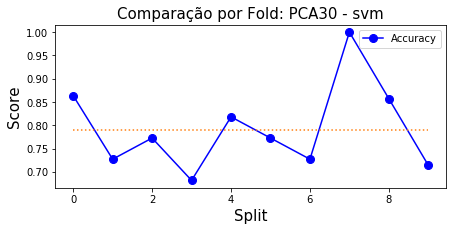

In [7]:
#DETERMINA QUAL DATASET A SER UTILZADO
#dataset_testado = 'COMPLETO'
#dataset_testado = 'COMPLETO_MORF'
#dataset_testado = 'PCA_MORF'
#dataset_testado = 'PCA'
#dataset_testado = 'PCA_IMPORTANCES'
#dataset_testado = 'KBEST_MORF'
#dataset_testado = 'KBEST'
dataset_testado = 'PCA30'
#dataset_testado = 'RFE_MORF'
#dataset_testado = 'RFE' #*
#dataset_testado = 'RANDON_FOREST_IMPORTANTES'
#dataset_testado = 'SFS_5_CV10_MORF'
#dataset_testado = 'SFS_5_CV10'#*

#dataset_testado = 'PCA55'


#A QUANTIDADE DE FOLDS QUE IREMOS TESTAR
k_qtd = 10

#Separa_dados(dataset_testado,k_qtd)
df_nb,XX,Y,cv_ = Separa_dados(dataset_testado,k_qtd)


## LISTA DE PARAMETROS PARA TESTE POR MODELO
parametros_mods = {
                    'svm':{
                        'model':svm.SVC(),
                        'params':{
                            'C':[0.0,0.001,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1,1.5,10,20],
                            'kernel':['rbf','linear','poly','sigmoid'],
                            #'gamma':[0.1,1,10,'auto','scale']
                            'gamma':[0.001,0.0010,0.01886792,0.0019,0.0018,0.0017,0.0016,0.002,0.003,0.005,0.01,0.02,0.03,0.04,0.5,1,10]
                            #,'max_iter':[1,-1]
                        }
                    }#,
                    #'naive_Gauss':{
                    #    'model':GaussianNB(),
                    #    'params':{
                    #        'var_smoothing':[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
                    #    }
                    #},  
                    #'naive_Bernouli':{
                    #    'model':BernoulliNB(),
                    #    'params':{
                    #        'alpha':[0.0,0.001,0.1,0.2,0.5,1,1.5,10,20],
                    #        'binarize':[0.0,0.001,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5]
                    #    }
                    #},
                    #'MLP':{
                    #    'model':MLPClassifier(),
                    #    'params':{
                    #        'max_iter':[30,60,90,120,150],
                    #        'activation':['identity','logistic','tanh','relu'],
                    #        'learning_rate_init':[0.01,0.05,0.1],
                    #        'hidden_layer_sizes':[8,18,36,53,328]
                    #    }
                    #},
                    #'RF':{
                    #    'model':RandomForestClassifier(),
                    #    'params':{
                    #        'n_estimators':[100,250,500,750,1000],
                    #        'criterion':['gini', 'entropy'],
                    #        'max_features':['sqrt','log2'],
                    #        'oob_score':[False,True],
                    #        'n_jobs': [-1],
                    #        'ccp_alpha': [0.0,0.05,0.1,0.2,0.5]
                    #    }
  
                    #}
                } 

#i=0
#metricas=[]

#LISTA DE SOCRE PARA TESTE
scoring = {'accuracy_score': make_scorer(accuracy_score), 'precision_score': make_scorer(precision_score),'recall_score': make_scorer(recall_score)}

df_metricas_total = None
metricas=[]
for model_name,mp in parametros_mods.items():
    
    classificador = GridSearchCV(mp['model'],mp['params'],cv=cv_,return_train_score=True, scoring=scoring, refit='accuracy_score')
    classificador.fit(XX, Y)
    y_pred = classificador.predict(XX)


    #Gera dataframe de todos os resultados obtidos para cada combinação de parametro
    resultados = pd.DataFrame(classificador.cv_results_)

    #Seleciona melhor resultado para o parametro escolido, nesse caso acurácia
    melhor_resultado = resultados.sort_values(by=['rank_test_accuracy_score']).head(1)
    #melhor_resultado = resultados.sort_values(by=['rank_test_accuracy_score','rank_test_precision_score','rank_test_recall_score']).head(1)

    #Guarda as médias dos resultados necessários
    acuracia_media = melhor_resultado['mean_test_accuracy_score']
    mean_test_precision_score = melhor_resultado['mean_test_precision_score']
    mean_test_recall_score = melhor_resultado['mean_test_recall_score']


    #CALCULA INDICE DE CONFIANÇA PARA CADA VALOR DE ACURÁCIA DO MELHOR RESULTADO
    IC_ACC=[]
    IC_REC=[]
    IC_PRES=[]
    TP=0
    TN=0
    FP=0
    FN=0
    vacc=[]
    vrec=[]
    vpres=[]
    for i in range(0,k_qtd):
        vacc.append(melhor_resultado['split' + str(i) + '_test_accuracy_score'].values)
        vrec.append(melhor_resultado['split' + str(i) + '_test_recall_score'].values)
        vpres.append(melhor_resultado['split' + str(i) + '_test_precision_score'].values)

    IC_ACC =sms.DescrStatsW(vacc).tconfint_mean(alpha=0.05)
    IC_REC =sms.DescrStatsW(vrec).tconfint_mean(alpha=0.05)  
    IC_PRES =sms.DescrStatsW(vpres).tconfint_mean(alpha=0.05)     
   

    #DEFINE MATRIZ DE CONFUSÃO
    matriz_confusao = pd.DataFrame(confusion_matrix(Y, y_pred),
                 columns=['pred_neg', 'pred_pos'], index=['neg', 'pos'])

    TP = matriz_confusao['pred_neg'][0]
    TN = matriz_confusao['pred_pos'][1]
    FP = matriz_confusao['pred_pos'][0]    
    FN = matriz_confusao['pred_neg'][1]


    #RECALL MÉDIO
    RECALL = round(TP/(TP+FN)*100,2)

    #PRECISÃO MÉDIO
    PRECISAO = round(TP/(TP+FP)*100,2)

    #EXIBE GRÁFICOS
    med=[]
    for i in range(0,k_qtd):
        med.append(float(round(acuracia_media,2)))


    plt.figure(figsize=(7,3))
    plt.plot(vacc, '-bo', label = 'Accuracy', markersize=8)
    plt.plot(med,color='C1',linestyle=':',markersize=12)
    plt.xlabel('Split', fontsize = 15)
    plt.ylabel('Score', fontsize = 15)
    plt.title(f'Comparação por Fold: {dataset_testado} -' +  f' {model_name}', fontsize = 15)
    plt.legend()

              
        

    metricas.append({
            'dataset_testado':dataset_testado,
            'modelo': model_name,
            'acuracia_media':f'{round(float(classificador.best_score_)*100,2)}%',
            'melhor_parametro':classificador.best_params_,
            'TP':TP,
            'TN':TN,
            'FP':FP,  
            'FN':FN,
            'RECALL_CALCULADO':RECALL,
            'recall_medio':f'{round(float(mean_test_recall_score)*100,2)}%',
            'PRECISAO_CALCULADA':PRECISAO,
            'precisao_media':f'{round(float(mean_test_precision_score)*100,2)}%',
            'ic_acuracia': f'{round(float(IC_ACC[0])*100,2)}% E {round(float(IC_ACC[1])*100,2)}%',
            'ic_recall': f'{round(float(IC_REC[0])*100,2)}% E {round(float(IC_REC[1])*100,2)}%',
            'ic_presicao': f'{round(float(IC_PRES[0])*100,2)}% E {round(float(IC_PRES[1])*100,2)}%'
    })  



df_metricas_total = pd.DataFrame(metricas,columns=['dataset_testado','modelo','melhor_parametro','acuracia_media'
                                                        #,'TP','TN','FP','FN','RECALL_CALCULADO','PRECISAO_CALCULADA'
                                                        ,'recall_medio','precisao_media'
                                                        ,'ic_acuracia','ic_recall','ic_presicao'])




plt.show() 
df_metricas_total


#SVM
df_metricas_total.to_csv(r'../EXPERIMENTOS/2020072422h00_PCA30_df_SVM_GridSearch.csv', index = False)

#NB
#df_metricas_total.to_csv(r'../EXPERIMENTOS/2020072422h00_PCA171_df_NB_GridSearch.csv', index = False)

#MLP
#df_metricas_total.to_csv(r'../EXPERIMENTOS/2020072422h00_PCA171_df_COMPLETO_GridSearch.csv', index = False)




# Random Forest Classifier
#df_metricas_total.to_csv(r'../EXPERIMENTOS/2020071822h50_PCA53_orig_df_COMPLETO_GridSearch.csv', index = False)
#df_metricas_total.to_csv(r'../EXPERIMENTOS/2020071218h50_RFE_Class_df_PCA_2_GridSearch.csv', index = False)
#df_metricas_total.to_csv(r'../EXPERIMENTOS/2020071218h50_RFE_Class_df_PCA_IMPORTANCES_2_GridSearch.csv', index = False)
#df_metricas_total.to_csv(r'../EXPERIMENTOS/2020071218h50_RFE_Class_df_KBEST_2_GridSearch.csv', index = False)
#df_metricas_total.to_csv(r'../EXPERIMENTOS/2020071218h50_RFE_Class_df_RFE_GridSearch.csv', index = False)
#df_metricas_total.to_csv(r'../EXPERIMENTOS/2020071218h50_RFE_Class_df_RF_IMPORTANCES_GridSearch.csv', index = False)
#df_metricas_total.to_csv(r'../EXPERIMENTOS/2020071218h50_RFE_Class_df_SFS_GridSearch.csv', index = False)

#df_metricas_total.to_csv(r'../EXPERIMENTOS/2020071015h05_df_COMPLETO_morf_GridSearch.csv', index = False)
#df_metricas_total.to_csv(r'../EXPERIMENTOS/2020071014h15_df_PCA_PC53_morf_GridSearch.csv', index = False)
#df_metricas_total.to_csv(r'../EXPERIMENTOS/2020071014h30_df_KBEST_morf_GridSearch.csv', index = False)
#df_metricas_total.to_csv(r'../EXPERIMENTOS/2020071014h40_df_RFE_morf_GridSearch.csv', index = False)
#df_metricas_total.to_csv(r'../EXPERIMENTOS/2020071014h50_df_SFS_N5_CV10_morf_GridSearch.csv', index = False)
